## Load data

In [1]:
import pandas as pd
import load

brands, orders, orderlines, products = load.load_data(load.original)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv("/content/drive/Shareddrives/Students Shared Drive/DSAI#001/04_Data_Cleaning_Storytelling/data/brands.csv")

In [5]:
import sys

sys.path.append("/content/drive/Shareddrives/Students Shared Drive/DSAI#001/04_Data_Cleaning_Storytelling/sample_solutions")

In [6]:
sys.path

['/content',
 '/env/python',
 '/usr/lib/python311.zip',
 '/usr/lib/python3.11',
 '/usr/lib/python3.11/lib-dynload',
 '',
 '/usr/local/lib/python3.11/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.11/dist-packages/IPython/extensions',
 '/root/.ipython',
 '/content/drive/Shareddrives/Students Shared Drive/DSAI#001/04_Data_Cleaning_Storytelling/sample_solutions']

## Brands

In [ ]:
brands.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   short   187 non-null    object
 1   long    187 non-null    object
dtypes: object(2)
memory usage: 3.1+ KB


In [ ]:
brands.duplicated().sum()

0

In [ ]:
brands.nunique()

short    187
long     181
dtype: int64

In [ ]:
# nothing alarming
brands.loc[brands["long"].duplicated(keep=False)]

,short,long
6,AP2,Apple
7,APP,Apple
17,BOS,Bose
19,CAD,Bose
37,ENV,Unknown
67,JYB,Jaybird
70,KEN,Jaybird
80,LIB,Unknown
94,MOP,Mophie
98,MUJ,Mophie


## Orderlines

In [ ]:
# id_order and orders.order_id should be mergable, change to consistent name
# unit_price should be a float
# date should be datetime type
orderlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293983 entries, 0 to 293982
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                293983 non-null  int64 
 1   id_order          293983 non-null  int64 
 2   product_id        293983 non-null  int64 
 3   product_quantity  293983 non-null  int64 
 4   sku               293983 non-null  object
 5   unit_price        293983 non-null  object
 6   date              293983 non-null  object
dtypes: int64(4), object(3)
memory usage: 15.7+ MB


In [ ]:
# id could be an index if I wanted
orderlines.nunique()

id                  293983
order_id            204855
product_quantity        67
sku                   7951
unit_price           11329
date                251631
dtype: int64

In [ ]:
# product_id is useless
# some product_quantity look suspicious
orderlines.describe()

,id,id_order,product_id,product_quantity
count,2.939830e+05,293983.000000,293983.0,293983.000000
mean,1.397918e+06,419999.116544,0.0,1.121126
std,1.530096e+05,66344.486479,0.0,3.396569
min,1.119109e+06,241319.000000,0.0,1.000000
25%,1.262542e+06,362258.500000,0.0,1.000000
50%,1.406940e+06,425956.000000,0.0,1.000000
75%,1.531322e+06,478657.000000,0.0,1.000000
max,1.650203e+06,527401.000000,0.0,999.000000


In [ ]:
orderlines = orderlines.drop("product_id", axis=1)

orderlines = orderlines.rename(columns={"id_order":"order_id"})

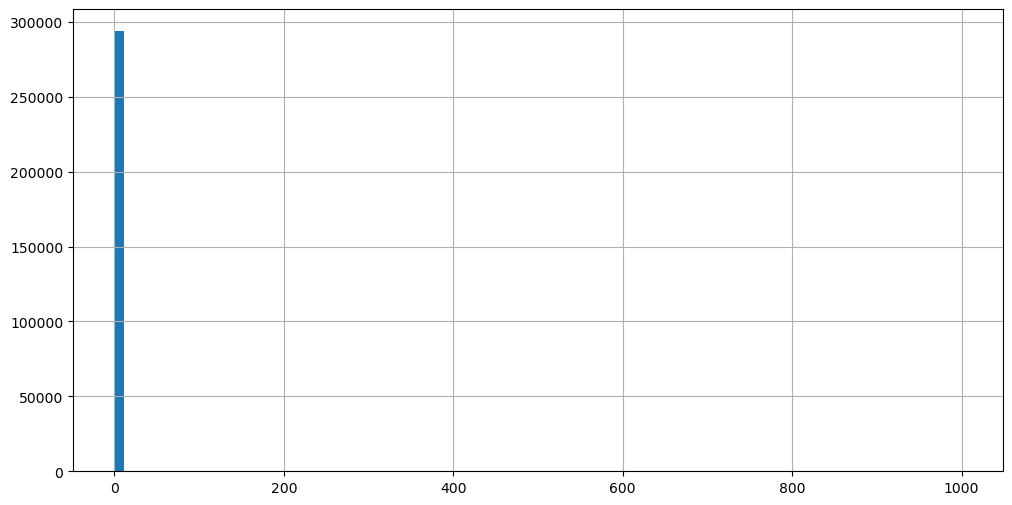

In [ ]:
# large orders are not numerous enough to see
orderlines["product_quantity"].hist(bins=100, figsize=(12, 6));

In [ ]:
# IQR is too small to determine outliers
# do unit_price line up with orders.total_paid?
orderlines.nlargest(15, "product_quantity")

,id,order_id,product_quantity,sku,unit_price,date
53860,1228150,346221,999,APP1190,55.99,2017-04-14 21:50:52
68712,1254032,358747,999,SEV0028,19.99,2017-05-24 14:51:58
57796,1234924,349475,800,KIN0137,7.49,2017-04-25 09:59:00
57306,1234111,349133,555,APP0665,70.99,2017-04-24 10:20:13
40813,1204788,335057,201,THU0029,80.99,2017-03-14 15:25:53
136675,1388261,417536,200,TRK0009,29.99,2017-10-25 15:02:39
204637,1500715,464858,192,APP1662,519.00,2017-12-17 15:53:04
246048,1574262,496172,164,EVU0013,19.99,2018-01-22 16:14:42
27779,1180010,323959,126,ADN0039,34.99,2017-02-14 10:21:12
285492,1637611,522075,125,XDO0047,25.99,2018-03-06 10:07:54


In [ ]:
# the numbers look like they could be right, but none of the large orders were completed
orderlines.nlargest(15, "product_quantity").merge(orders, on="order_id", how="left")

,id,order_id,product_quantity,sku,unit_price,date,created_date,total_paid,state
0,1228150,346221,999,APP1190,55.99,2017-04-14 21:50:52,2017-04-14 21:50:52,55930.71,Shopping Basket
1,1254032,358747,999,SEV0028,19.99,2017-05-24 14:51:58,2017-05-24 14:51:58,100738.45,Shopping Basket
2,1234924,349475,800,KIN0137,7.49,2017-04-25 09:59:00,2017-04-25 09:59:00,5995.91,Place Order
3,1234111,349133,555,APP0665,70.99,2017-04-24 10:20:13,2017-04-24 10:20:13,39399.84,Shopping Basket
4,1204788,335057,201,THU0029,80.99,2017-03-14 15:25:53,2017-03-14 15:25:53,16360.00,Shopping Basket
5,1388261,417536,200,TRK0009,29.99,2017-10-25 15:02:39,2017-10-25 15:02:39,5997.98,Shopping Basket
6,1500715,464858,192,APP1662,519.00,2017-12-17 15:53:04,2017-12-17 15:53:04,99648.10,Shopping Basket
7,1574262,496172,164,EVU0013,19.99,2018-01-22 16:14:42,2018-01-22 16:14:01,3278.43,Shopping Basket
8,1180010,323959,126,ADN0039,34.99,2017-02-14 10:21:12,2017-02-14 10:21:12,4408.69,Shopping Basket
9,1637611,522075,125,XDO0047,25.99,2018-03-06 10:07:54,2018-03-06 10:07:54,3248.70,Shopping Basket


In [ ]:
# id is unique, what happens if it is dropped before checking for duplicates?
(
    orderlines
    .drop("id", axis=1)
    .duplicated()
    .sum()
)

0

In [ ]:
# ValueError: could not convert string to float: '1.137.99'
# one price has two decimal points, do other prices have that?
orderlines["unit_price"].astype(float)

ValueError: could not convert string to float: '1.137.99'

In [ ]:
# that's a lot of rows!
two_periods = orderlines["unit_price"].str.count(r"\.") > 1
orderlines.loc[two_periods]

,id,order_id,product_quantity,sku,unit_price,date
6,1119115,299544,1,APP1582,1.137.99,2017-01-01 01:17:21
11,1119126,299549,1,PAC0929,2.565.99,2017-01-01 02:07:42
15,1119131,299553,1,APP1854,3.278.99,2017-01-01 02:14:47
43,1119195,299582,1,PAC0961,2.616.99,2017-01-01 08:54:00
59,1119214,299596,1,PAC1599,2.873.99,2017-01-01 09:53:11
...,...,...,...,...,...,...
293862,1649999,452946,1,APP2075,2.999.00,2018-03-14 13:03:33
293887,1650045,527321,1,PAC2148,3.497.00,2018-03-14 13:10:15
293889,1650050,527324,1,PAC2117,3.075.00,2018-03-14 13:10:56
293911,1650088,527342,1,APP2492,1.329.00,2018-03-14 13:24:51


## Orders

In [ ]:
# total_paid should be datetime type
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226909 entries, 0 to 226908
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   order_id      226909 non-null  int64  
 1   created_date  226909 non-null  object 
 2   total_paid    226904 non-null  float64
 3   state         226909 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 6.9+ MB


In [ ]:
# order_id could be an index if I wanted
orders.nunique()

order_id        226909
created_date    224828
total_paid       31236
state                5
dtype: int64

In [ ]:
orders["total_paid"].describe()

count    226904.000000
mean        569.225818
std        1761.778002
min           0.000000
25%          34.190000
50%         112.990000
75%         525.980000
max      214747.530000
Name: total_paid, dtype: float64

In [ ]:
# which states should be included for the analysis?
orders["state"].value_counts()

state
Shopping Basket    117809
Completed           46605
Place Order         40883
Pending             14379
Cancelled            7233
Name: count, dtype: int64

In [ ]:
# order_id is unique, what happens if it is dropped before checking for duplicates?
(
    orders
    .drop("order_id", axis=1)
    .duplicated()
    .sum()
)

115

In [ ]:
# are these a mistake?
# maybe should merge with orderlines and see if all the items are the same
orders_duplicates = orders.drop("order_id", axis=1).duplicated(keep=False)
orders.loc[orders_duplicates]

,order_id,created_date,total_paid,state
6939,306408,2017-01-10 12:00:01,1019.00,Place Order
6940,306409,2017-01-10 12:00:01,1019.00,Place Order
11432,310906,2017-01-17 12:00:01,1019.00,Cancelled
11433,310907,2017-01-17 12:00:01,1019.00,Cancelled
11434,310908,2017-01-17 12:00:01,1019.00,Cancelled
...,...,...,...,...
223370,523862,2018-03-09 15:37:19,29.99,Shopping Basket
224613,525105,2018-03-10 20:57:16,1188.00,Shopping Basket
224614,525106,2018-03-10 20:57:16,1188.00,Shopping Basket
226678,527171,2018-03-14 12:15:18,9.99,Shopping Basket


In [ ]:
# that would be a lot of coincidence for all information to match except the IDs (which are probably automatically created)
# too bad I have no customer id to compare these with
(
    orders
    .loc[orders_duplicates]
    .merge(orderlines, on="order_id", how="left")
    .drop(["order_id", "id"], axis=1)
    .duplicated()
    .sum()
)

195

## Products

In [ ]:
# price and promo_price should be floats
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19326 entries, 0 to 19325
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   sku          19326 non-null  object
 1   name         19326 non-null  object
 2   desc         19319 non-null  object
 3   price        19280 non-null  object
 4   promo_price  19326 non-null  object
 5   in_stock     19326 non-null  int64 
 6   type         19276 non-null  object
dtypes: int64(1), object(6)
memory usage: 1.0+ MB


In [ ]:
# sku should be unique but it isn't
products.nunique()

sku            10579
name           10373
desc            7098
price           2690
promo_price     4614
in_stock           2
type             126
dtype: int64

In [ ]:
# similar problems to orderlines.unit_price
products["price"].astype(float)
products["promo_price"].astype(float)

ValueError: could not convert string to float: '1.639.792'

In [ ]:
two_periods_price = products["price"].str.count(r"\.") > 1
two_periods_promo = products["promo_price"].str.count(r"\.") > 1

# that's most of the rows!
products.loc[two_periods_price | two_periods_promo]

,sku,name,desc,price,promo_price,in_stock,type
50,APP0367,Apple Mini DisplayPort to DVI Adapter Mac dual...,Adapter Mini Display Port to DVI dual channel ...,119,1.119.976,0,1325
51,APP0344,"Apple Thunderbolt Display 27 ""Monitor Mac",Monitor Display 27-inch Apple Thunderbolt (MC9...,1149,10.449.923,0,1296
66,MAK0008,Maclocks theft case iPad 2 3 and 4 black with ...,Case antitheft iPad 2 3 and 4 polycarbonate ro...,120,1.199.957,0,12635403
67,MAK0007,Maclocks theft case iPad 2 3 and 4 transparent...,Case antitheft iPad 2 3 and 4 polycarbonate ro...,120,1.079.961,0,12635403
97,MAK0014,Maclocks safety housing Kiosk iPad 2 3 and 4 b...,Holder and housing iPad 2 3 and 4 aluminum and...,164.99,1.649.896,0,1216
...,...,...,...,...,...,...,...
19316,REP0407,iPad battery repair,Repair service including parts and labor for iPad,6.999.003,69.99,0,"1,44E+11"
19317,REP0403,iPad LCD screen repair,Repair service including parts and labor for iPad,159.99,1.599.898,0,"1,44E+11"
19318,REP0402,iPad touch screen repair,Repair service including parts and labor for iPad,139.99,1.399.897,0,"1,44E+11"
19319,KNO0032,"Knomo MacBook Pro Beauchamp Backpack 14 ""Black",Backpack thin nylon mesh internal compartment ...,179,1.699.905,1,1392


In [ ]:
# looks similar to the number of overlapping sku
products.duplicated().sum()

8746